# CPSC 4970 AI + ML: Module 2

In [4]:
import sklearn.datasets
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

plt.style.use('dark_background')

## Exploratory Data Analysis -- skipping some steps

In [5]:
db = sklearn.datasets.load_diabetes(as_frame=True)['frame']
print(db.info())
train, test = train_test_split(db, test_size=0.33)
# X = everything but last column
X_train = train.iloc[:, :-1]
X_test = test.iloc[:, :-1]
# y = target column
y_train = train['target']
y_test = test['target']

display(X_train.head())
display(y_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
267,0.059871,-0.044642,-0.000817,-0.084856,0.075484,0.079478,0.004460,0.034309,0.023371,0.027917
317,0.019913,-0.044642,-0.034229,0.055165,0.067229,0.074155,-0.006584,0.032833,0.024730,0.069338
282,0.070769,-0.044642,-0.005128,-0.005670,0.087868,0.102965,0.011824,0.034309,-0.008943,0.027917
194,-0.067268,-0.044642,-0.059019,0.032201,-0.051103,-0.049539,-0.010266,-0.039493,0.002004,0.023775
116,0.048974,0.050680,0.058463,0.070072,0.013567,0.020607,-0.021311,0.034309,0.022004,0.027917


267    115.0
317    190.0
282    230.0
194     86.0
116    275.0
Name: target, dtype: float64

## Create linear regression model

Training MSE:  2752.189219904339
Training R2:  0.5374863085951509
151.86008113679108 [ -22.79400405 -231.45843981  536.05489153  233.50046598 -206.10906813
   31.19959528 -110.11639721  239.20983942  519.82313341  113.69118819]


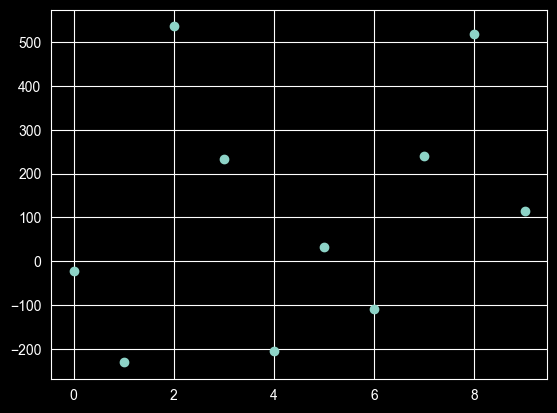

In [6]:
lr = LinearRegression().fit(X_train, y_train)
train_predicted = lr.predict(X_train)
print("Training MSE: ", mean_squared_error(y_train, train_predicted))
print("Training R2: ", lr.score(X_train, y_train))
print(lr.intercept_, lr.coef_)
plt.scatter(range(len(lr.coef_)), lr.coef_)

## Create quadratic model

(65,)
Training MSE:  2111.105011617167
Training R2:  0.6452224415368246


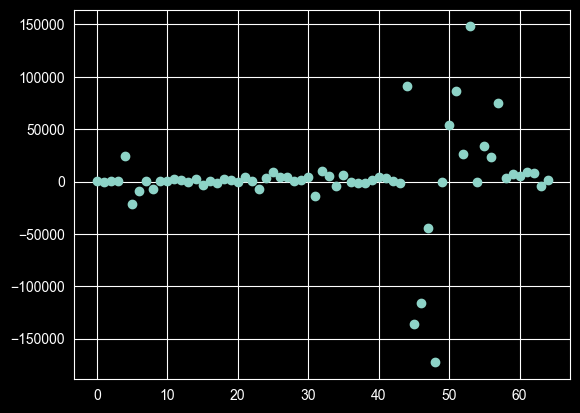

In [7]:
polynomial = PolynomialFeatures(degree=2, include_bias=False)
polynomial.fit(X_train)
X_train_poly = polynomial.transform(X_train)
lr = LinearRegression().fit(X_train_poly, y_train)
train_predicted = lr.predict(X_train_poly)
print(lr.coef_.shape)
plt.scatter(range(len(lr.coef_)), lr.coef_)
print("Training MSE: ", mean_squared_error(y_train, train_predicted))
print("Training R2: ", lr.score(X_train_poly, y_train))